In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('../data/resume_data.csv')
df.head()

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...


In [19]:
df.shape

(2484, 3)

In [20]:
df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [21]:
df.isnull().sum()

ID          0
Category    0
Feature     1
dtype: int64

In [22]:
df.dropna(inplace=True)
df.isnull().sum()

ID          0
Category    0
Feature     0
dtype: int64

In [23]:
df.duplicated().sum()

0

### EDA

In [24]:
df_count = df['Category'].value_counts().reset_index()
df_count.columns = ['Category', 'Count']

# Create bar plot with custom colors and actual counts
fig = px.bar(df_count, x='Category', y='Count', title="Count of Each Category", text='Count', 
             color='Category')

# Customize layout and display text on bars
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Count",
    showlegend=False
)

fig.show()

In [25]:
fig = px.pie(df, names='Category')
fig.update_traces(textinfo = 'percent+label')
fig.show()

In [26]:
from sklearn.utils import resample

max_count = df['Category'].value_counts().max()

balanced_data = []
for category in df['Category'].unique():
    category_data = df[df['Category']==category]
    if len(category_data)<max_count:
        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)
    else:
        balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_category_data)
    
    
balanced_data = pd.concat(balanced_data)
balanced_data['Category'].value_counts()

Category
HR                        120
DESIGNER                  120
ARTS                      120
BANKING                   120
PUBLIC-RELATIONS          120
CONSTRUCTION              120
ACCOUNTANT                120
ENGINEERING               120
APPAREL                   120
FINANCE                   120
CHEF                      120
AUTOMOBILE                120
DIGITAL-MEDIA             120
CONSULTANT                120
SALES                     120
BPO                       120
AGRICULTURE               120
FITNESS                   120
HEALTHCARE                120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  120
TEACHER                   120
INFORMATION-TECHNOLOGY    120
AVIATION                  120
Name: count, dtype: int64

## Vectorizing Data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from collections import Counter

X = balanced_data['Feature']
y = balanced_data['Category']


vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

encoder = LabelEncoder()
y_labeled = encoder.fit_transform(y)


In [44]:
labels = {int(encoded): original for encoded, original in zip(encoder.transform(encoder.classes_), encoder.classes_)}
labels

{0: 'ACCOUNTANT',
 1: 'ADVOCATE',
 2: 'AGRICULTURE',
 3: 'APPAREL',
 4: 'ARTS',
 5: 'AUTOMOBILE',
 6: 'AVIATION',
 7: 'BANKING',
 8: 'BPO',
 9: 'BUSINESS-DEVELOPMENT',
 10: 'CHEF',
 11: 'CONSTRUCTION',
 12: 'CONSULTANT',
 13: 'DESIGNER',
 14: 'DIGITAL-MEDIA',
 15: 'ENGINEERING',
 16: 'FINANCE',
 17: 'FITNESS',
 18: 'HEALTHCARE',
 19: 'HR',
 20: 'INFORMATION-TECHNOLOGY',
 21: 'PUBLIC-RELATIONS',
 22: 'SALES',
 23: 'TEACHER'}

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X_vectorized,y_labeled, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred))

Accuracy score:  0.8506944444444444


In [31]:
from sklearn.metrics import classification_report

report_classification = classification_report(y_test, y_pred)
print('Classification Report: \n', report_classification)

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.95      0.86        20
           1       0.84      0.72      0.78        29
           2       0.95      0.91      0.93        23
           3       0.69      0.82      0.75        22
           4       1.00      0.62      0.77        24
           5       1.00      0.68      0.81        19
           6       0.97      1.00      0.98        28
           7       0.87      0.59      0.70        22
           8       1.00      1.00      1.00        15
           9       0.71      0.94      0.81        18
          10       0.82      0.96      0.89        28
          11       0.92      0.96      0.94        25
          12       1.00      0.71      0.83        31
          13       0.92      0.79      0.85        28
          14       0.95      0.90      0.93        21
          15       0.85      0.96      0.90        23
          16       0.80      0.76      0.78        21
  

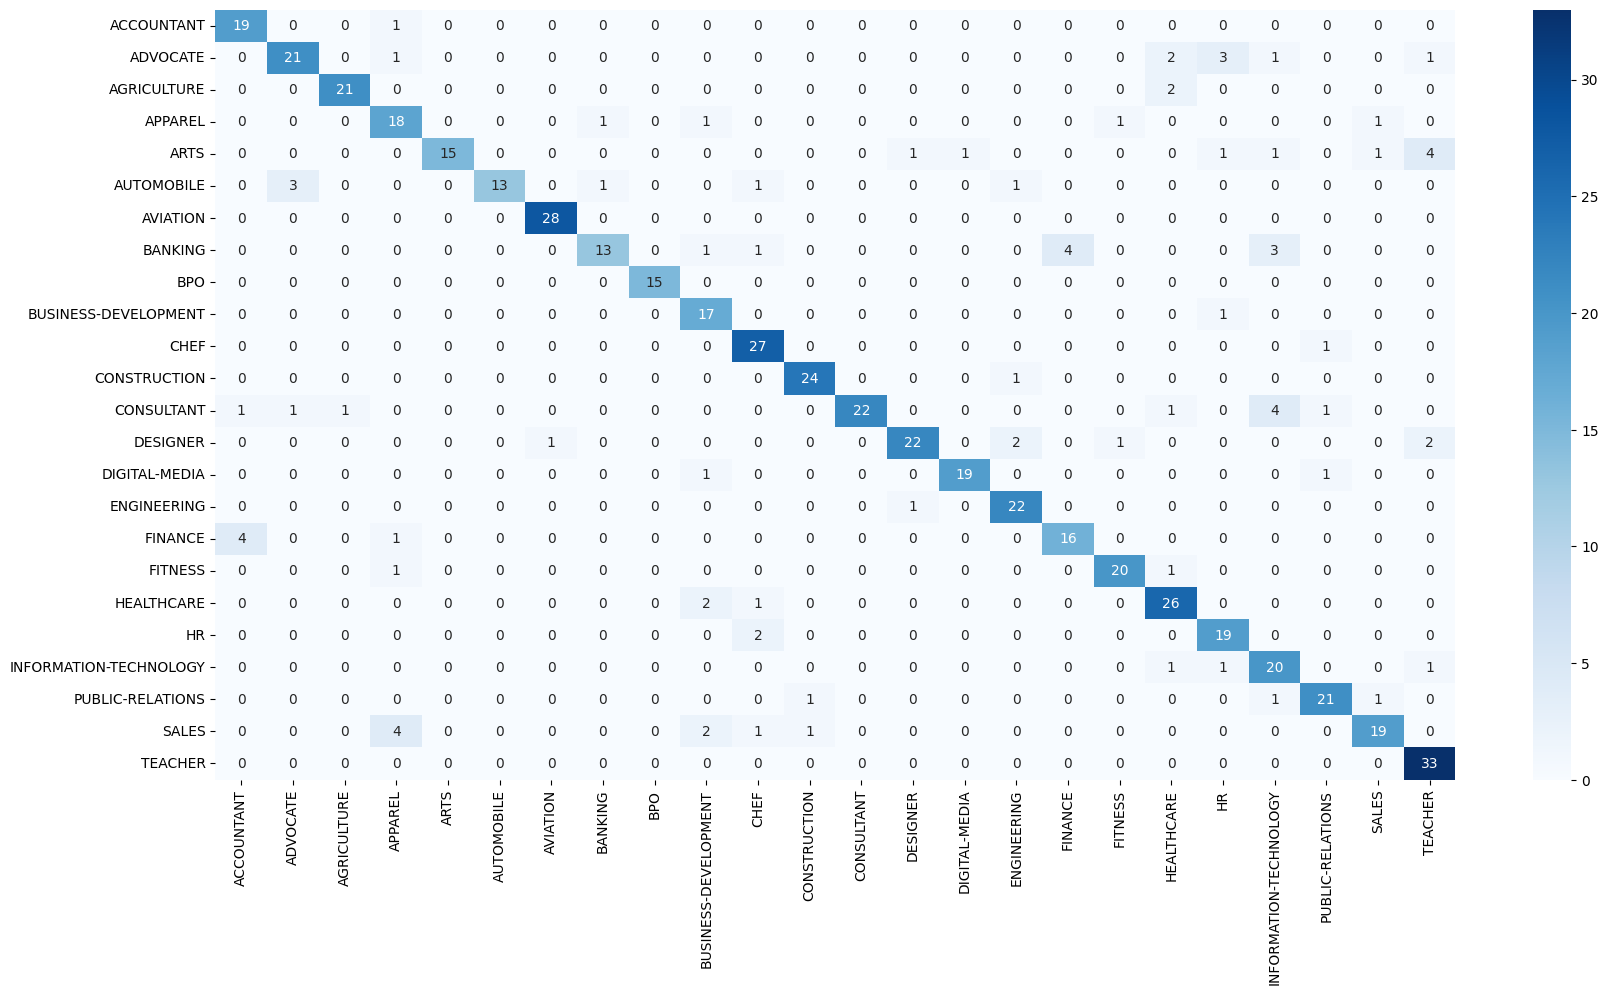

In [41]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,10))
sns.heatmap(conf_matrix, annot=True, xticklabels=encoder.classes_, yticklabels=encoder.classes_, cmap='Blues')
plt.show()

## Dumping the files

In [49]:
# Dumping the pickle files
import pickle
import os
import json

artifacts_path = '../artifacts/categorization'
os.makedirs(artifacts_path, exist_ok=True)
vectorizer_path = os.path.join(artifacts_path, 'vectorizer.pkl')

with open(vectorizer_path, 'wb') as file:
    pickle.dump(vectorizer, file)

# Dumping the label encoder
encoder_path = os.path.join(artifacts_path, 'encoder.pkl')
with open(encoder_path, 'wb') as file:
    pickle.dump(encoder, file) 

labels_path = os.path.join(artifacts_path, 'labels.json')
with open(labels_path, 'w') as file:
    json.dump(labels, file)

model_path = os.path.join(artifacts_path, 'model.pkl')
with open(model_path, 'wb') as file:
    pickle.dump(model, file)

In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_vectorized,y_labeled, test_size=0.2, random_state=42)

estimator = AdaBoostClassifier(random_state=42)
params = {'n_estimators': list(range(1,10)), 'learning_rate':[0.1,0.3,0.5,0.8,1]}
grid_search = GridSearchCV(estimator, params, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print('Accuracy Score Train: ', accuracy_score(y_train, y_pred_train))
print('Accuracy score Test: ', accuracy_score(y_test, y_pred))

c:\Users\latha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

c:\Users\latha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

c:\Users\latha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

c:\Users\latha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use t

Accuracy Score Train:  0.22569444444444445
Accuracy score Test:  0.2378472222222222
